In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from scipy.stats import norm


In [23]:
def trust(gaus1, gaus2):
    m_s, s_s = gaus1 # opinion self (mean + std) 
    m_e, s_e = gaus2 # opinion expert (mean + std)
    r = norm.rvs(loc=m_e, scale=s_e, size=100)
    method = 'sum'
    if method=='prod':
        trust = np.log(norm.pdf(r, loc=m_s, scale=s_s)).sum()
    elif method=='sum':
        trust = np.sum(norm.pdf(r, loc=m_s, scale=s_s))
    return trust

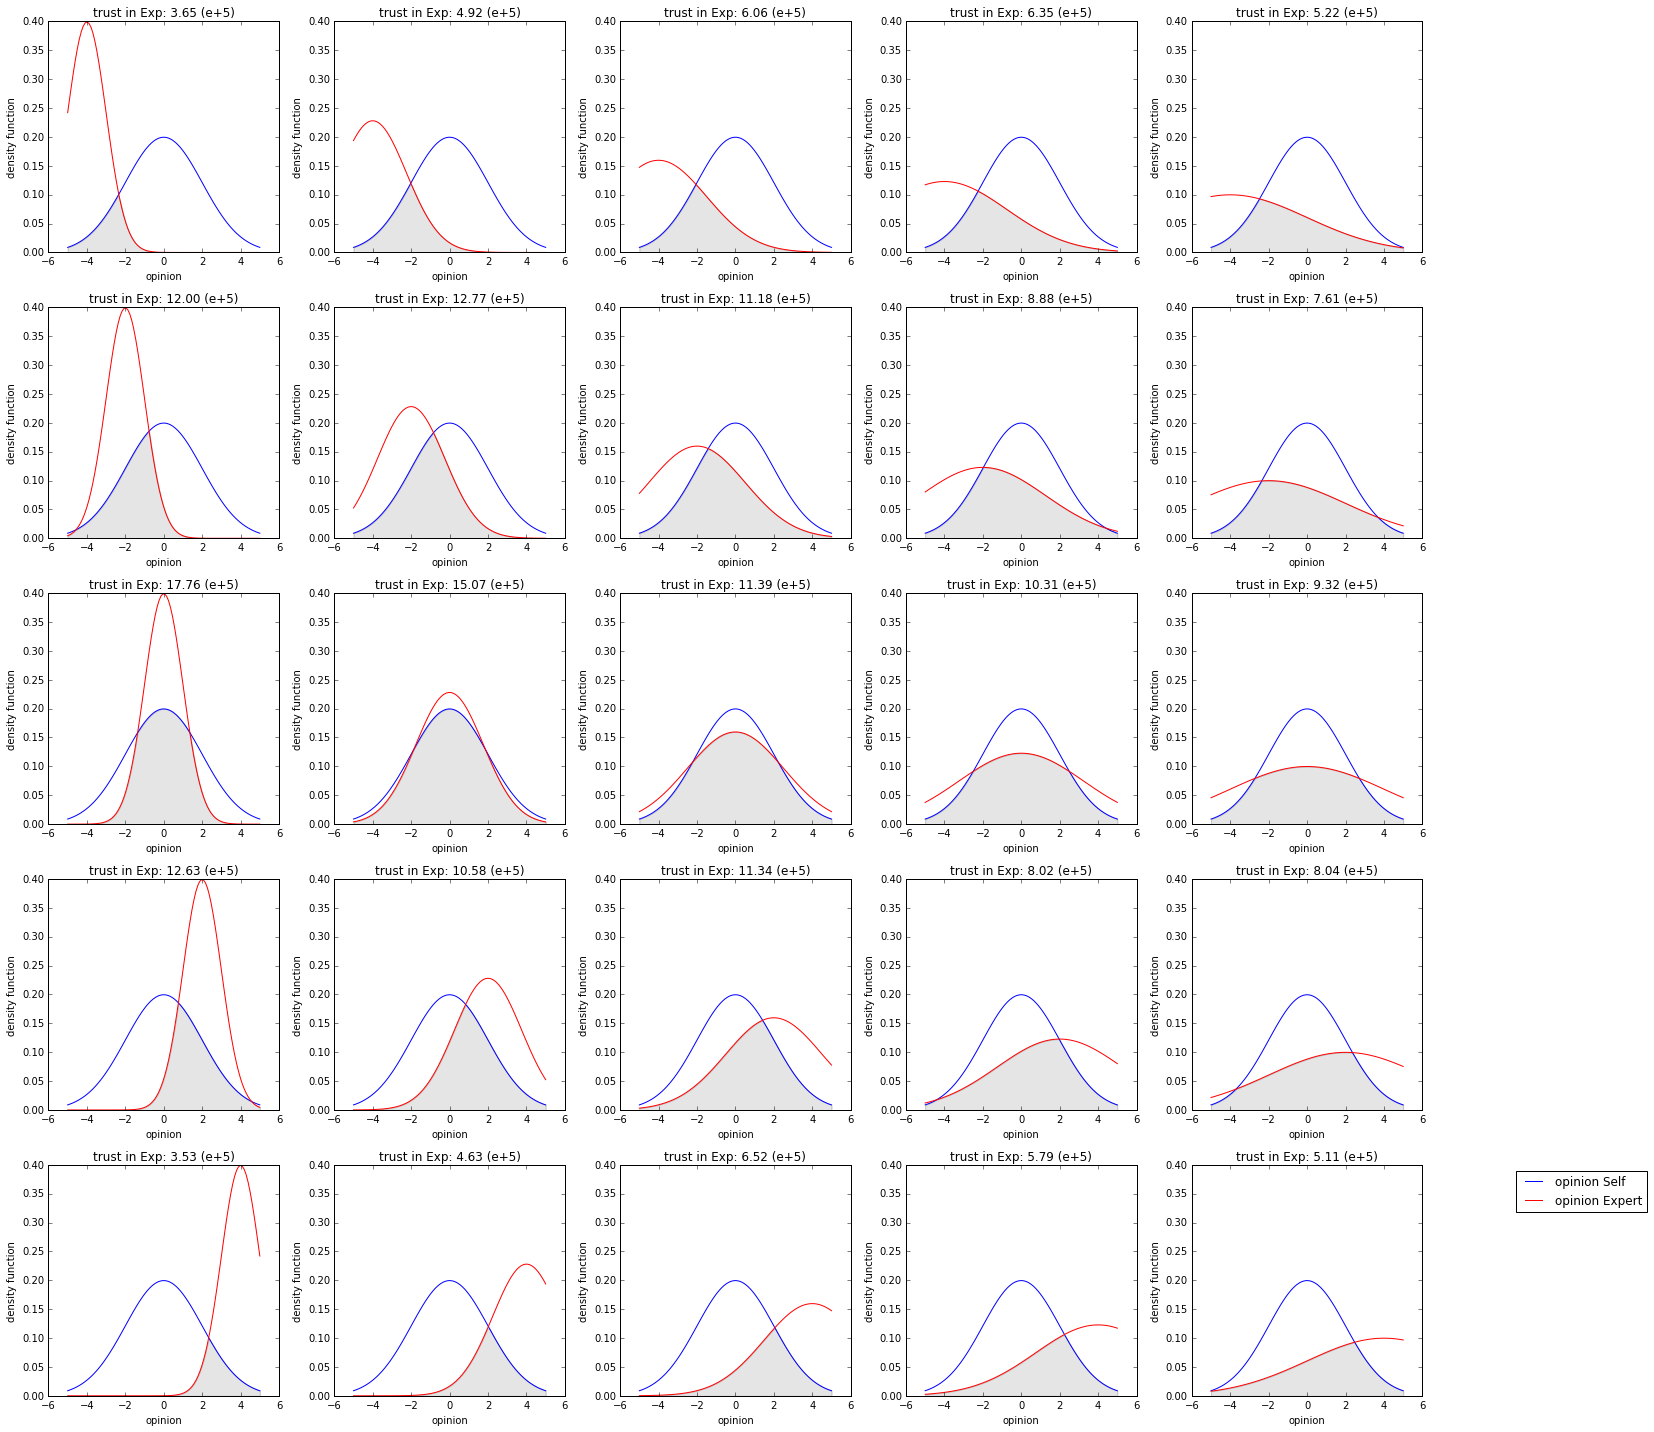

In [24]:
mrange = np.linspace(-4,4,5)
srange = np.linspace(1,4,5)

m_s, s_s = (0,2)
c = 0
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(20,20))
for m_e in mrange:
    for s_e in srange:
        c+=1
        # compute normal distributions
        gaus1 = norm.pdf(x, loc=m_s, scale=s_s)
        gaus2 = norm.pdf(x, loc=m_e, scale=s_e)

        # plot
        plt.subplot(5,5,c)
        plt.plot(x,gaus1)
        plt.plot(x,gaus2, 'r')
        plt.fill_between(x=x, y1=[min(gaus1[i],gaus2[i]) for i,v in enumerate(gaus1)], alpha=.2, facecolor='gray')
        plt.xlabel('opinion')
        plt.ylabel('density function')
#         plt.xlim([0,1])
        plt.ylim([0,.4])
        plt.title('trust in Exp: %.2f (e+5)' % (trust((m_s,s_s),(m_e,s_e))))

plt.legend(['opinion Self','opinion Expert'], bbox_to_anchor=(2, 1))
plt.tight_layout()

### TO DO 

Here we need to define a function that updates nodes opinions based on neighbors opinions and trust vector

In [29]:
m = np.array([1,2,3]) # array of means of neighbor opinions
t = np.array([2,2,1]) # array of trust of neighbors
def update(gaus_s, m, t):
    """
    Update opinion as trust weighted average
    input:
    gaus_s: mean and std of self currently held opinion
    m: vector of neighbors means
    s: vecor of neighbors std
    t: vector of neighbor trust as output by trust function
    """
    m_s, s_s = gaus_s # currently held belief
    m.concatenate
    np.average(m, weights=t)
    return


1.6666666666666667